In [2]:
import numpy as np
import math
import imageio as im
from matplotlib import pyplot as plt

In [4]:
image = im.imread('polymersomes.tif')

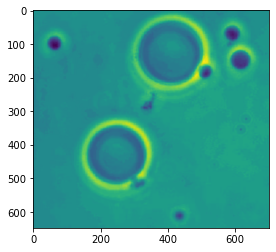

In [5]:
plt.imshow(image)

In [6]:
def calculate_histogram(image):
  histogram = [0] * 256
  for row in image:
    for pixel in row:
      histogram[pixel] += 1
  plt.plot(histogram)  
  return histogram

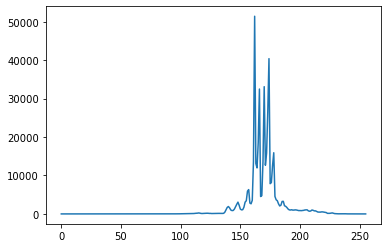

In [7]:
hist = calculate_histogram(image)

In [8]:
def global_threshold_value(hist,diff = 1):
    tot = sum(hist)
    s = sum(i*count for i,count in enumerate(hist))
    Thres = s/tot
    Thres = math.ceil(Thres)
    while True:
        m1 = 0
        tot1 = 0
        for i in range(Thres):
            m1 += i*hist[i]
            tot1 += hist[i]
        m2 = 0
        tot2 = 0
        for i in range(Thres,len(hist)):
            m2 += i*hist[i]
            tot2 += hist[i]
        m1 = m1/tot1
        m2 = m2/tot2
        T = 0.5*(m1+m2)
        if abs(T - Thres)<diff:
            break
        Thres = math.ceil(T)
    return Thres

def global_threshold_mask(img, hist, diff = 1):
    T = global_threshold_value(hist,diff)
    mask = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            mask[i][j] = 255 if img[i][j]<T else 0
    return mask,T

global_thres_image,Thres = global_threshold_mask(image,hist)


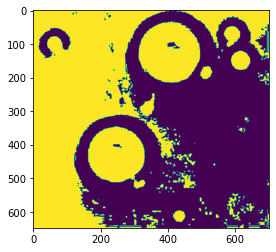

In [9]:
plt.imshow(global_thres_image)

In [10]:
print(Thres)

170


In [11]:
def otsu_method_value(hist):
    tot = sum(hist)
    norm_hist = [i/tot for i in hist]

    cumulative_sum = [0] * 256
    for i in range(len(hist)):
        cumulative_sum[i] = cumulative_sum[i-1] + norm_hist[i]

    cumulative_mean = [0] * 256
    for i in range(256):
        cumulative_mean[i] = cumulative_mean[i-1] + norm_hist[i]*i

    global_mean = cumulative_mean[255]

    sigma = [0]*256
    for i in range(len(hist)):
        p1 = cumulative_sum[i]
        p2 = 1-p1
        if p1==0 or p2==0:
            continue
        sigma[i] = (global_mean*p1 - cumulative_mean[i])**2/(p1*p2)
    
    k = 0
    max = 0
    avg_sum = 0

    for i in range(len(sigma)):
        if max<sigma[i]:
            max = sigma[i]
            avg_sum = i
            k = 1
        elif max==sigma[i]:
            k += 1
            avg_sum += i

    T = avg_sum/k
    return T

def otsu_method_mask(img, hist):
    T = otsu_method_value(hist)
    mask = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            mask[i][j] = 255 if img[i][j]<T else 0
    return mask,T

otsu_thres_image, Othrsu = otsu_method_mask(image, hist)

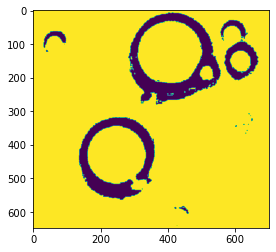

In [12]:
plt.imshow(otsu_thres_image)

In [13]:
print(Othrsu)

181.0


In [22]:
##############For fingerprint
image = im.imread('fingerprint.tif')

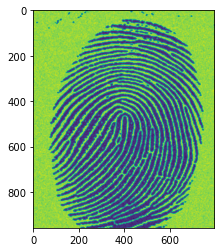

In [23]:
plt.imshow(image)

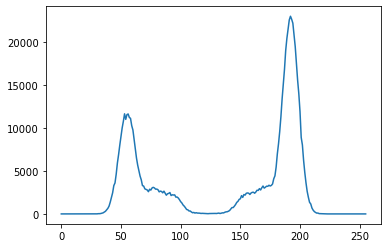

In [24]:
hist = calculate_histogram(image)

In [25]:
###########global Thrsholding
global_thres_image,Thres = global_threshold_mask(image,hist)

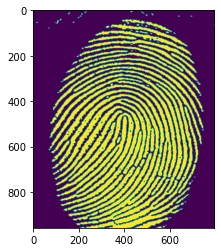

In [26]:
plt.imshow(global_thres_image)

In [27]:
print(Thres)

126


In [28]:
################Otsu Thresholding Algorithm
otsu_thres_image, Othrsu = otsu_method_mask(image, hist)

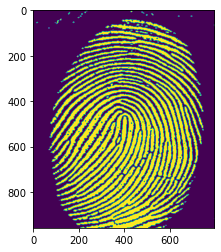

In [29]:
plt.imshow(otsu_thres_image)

In [30]:
print(Othrsu)

125.0
